# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [ ]:
websites = pd.read_csv('https://raw.githubusercontent.com/eduardoheros/lab-supervised-learning/master/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [ ]:
websites.head()

URL  URL_LENGTH  ...  DNS_QUERY_TIMES Type
0   M0_109          16  ...              2.0    1
1  B0_2314          16  ...              0.0    0
2   B0_911          16  ...              0.0    0
3   B0_113          17  ...              8.0    0
4   B0_403          17  ...              4.0    0

[5 rows x 21 columns]

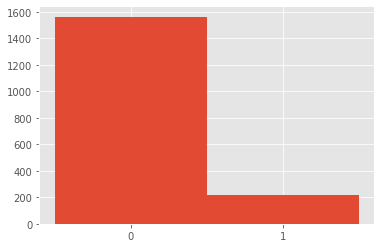

In [75]:
plt.xticks(ticks=[.25,0.75],labels=[0,1])
websites.Type.hist(bins=2);

In [65]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1779 non-null   int64  
 1   CHARSET               1779 non-null   object 
 2   SERVER                1779 non-null   object 
 3   WHOIS_COUNTRY         1779 non-null   object 
 4   DIST_REMOTE_TCP_PORT  1779 non-null   int64  
 5   REMOTE_IPS            1779 non-null   int64  
 6   APP_BYTES             1779 non-null   int64  
 7   REMOTE_APP_PACKETS    1779 non-null   int64  
 8   SOURCE_APP_BYTES      1779 non-null   int64  
 9   DNS_QUERY_TIMES       1779 non-null   float64
 10  Type                  1779 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 166.8+ KB


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


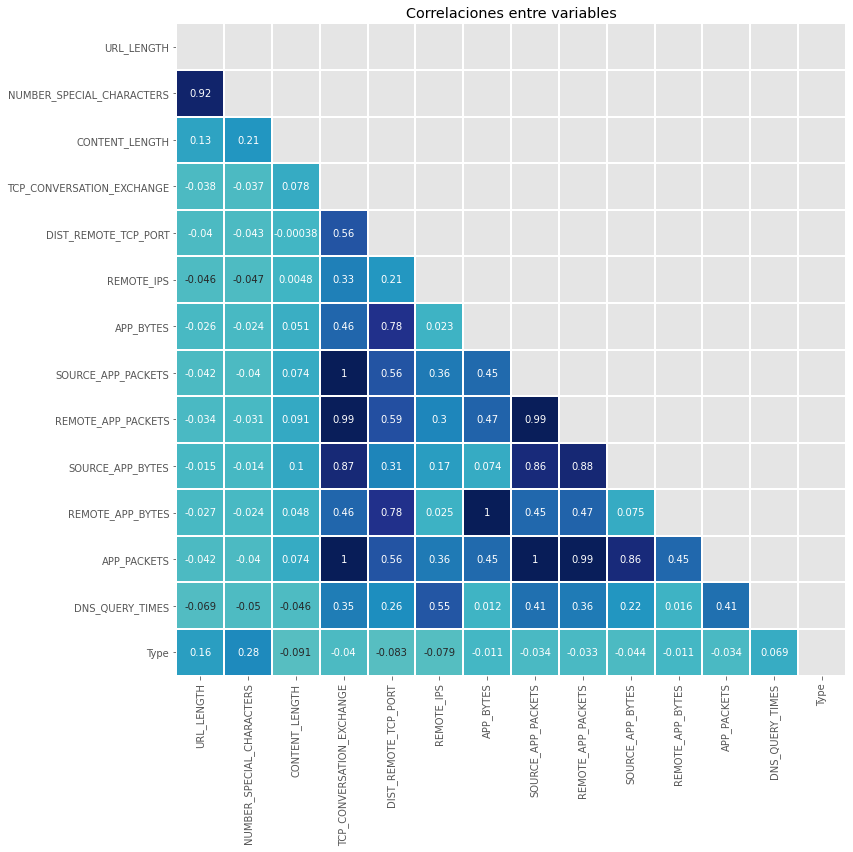

In [ ]:
def visual_corr(websites):
  matrix_corr=websites.corr()
  mask=np.triu(matrix_corr)
  plt.style.use("ggplot")
  plt.figure(figsize=(12,12))
  plt.title("Correlaciones entre variables")
  sns.heatmap(matrix_corr,annot=True,mask=mask,cbar=False,linewidths=1,cmap="YlGnBu",center=0);
visual_corr(websites)

In [ ]:
###Funcion que convierte en pesos de penalizacion las correlaciones mas fuertes
def corr_values(x):
  x=abs(x)
  if 0.5<x<0.9:
    x=10*x
  elif 0.9<x<0.99:
    x=100*x
  elif x>0.99:
    x=1000*x
  return x

In [ ]:
##Funcion que devuelve las columnas con correlaciones mas altas ordenadas de mayor a menor
def col_rem(websites):
  sum_matrix_corr=websites.corr()
  sum_matrix_corr=sum_matrix_corr.applymap(corr_values)
  sum_matrix_corr["SUM"]=sum_matrix_corr.sum(axis=1)-1000
  sort_corr=sum_matrix_corr.sort_values(by="SUM",ascending=False)
  return sort_corr["SUM"]

In [ ]:
##Las columnas listadas presentan las correlaciones mas altas
col_rem(websites)

TCP_CONVERSATION_EXCHANGE    3002.440122
SOURCE_APP_PACKETS           2112.741926
APP_PACKETS                  2112.741926
REMOTE_APP_PACKETS           1205.210952
REMOTE_APP_BYTES             1009.854344
APP_BYTES                    1009.834958
NUMBER_SPECIAL_CHARACTERS      92.644123
URL_LENGTH                     92.469935
DIST_REMOTE_TCP_PORT           39.199744
SOURCE_APP_BYTES               35.634526
DNS_QUERY_TIMES                 7.745818
REMOTE_IPS                      7.447180
CONTENT_LENGTH                  1.002322
Type                            0.972359
Name: SUM, dtype: float64

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [ ]:
columnas=col_rem(websites).index[0:3]

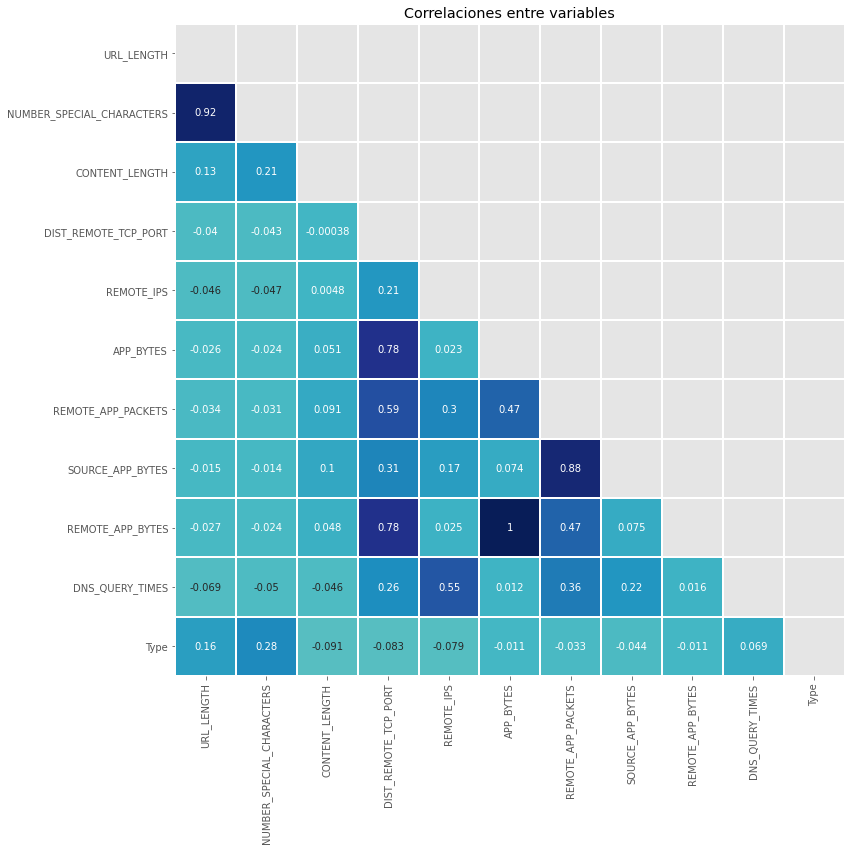

In [ ]:
websites.drop(columns=columnas,inplace=True)
visual_corr(websites)

In [ ]:
col_rem(websites)

REMOTE_APP_BYTES             1008.500746
APP_BYTES                    1008.485993
NUMBER_SPECIAL_CHARACTERS      92.526472
URL_LENGTH                     92.347000
DIST_REMOTE_TCP_PORT           22.475633
REMOTE_APP_PACKETS             16.505584
SOURCE_APP_BYTES                9.828820
DNS_QUERY_TIMES                 6.574300
REMOTE_IPS                      6.393891
Type                            0.863329
CONTENT_LENGTH                  0.775587
Name: SUM, dtype: float64

In [ ]:
websites.drop(columns="REMOTE_APP_BYTES",inplace=True)
col_rem(websites)

NUMBER_SPECIAL_CHARACTERS    92.502374
URL_LENGTH                   92.320315
REMOTE_APP_PACKETS           16.035183
DIST_REMOTE_TCP_PORT         14.663516
SOURCE_APP_BYTES              9.753491
APP_BYTES                     8.494016
DNS_QUERY_TIMES               6.558085
REMOTE_IPS                    6.368568
Type                          0.852325
CONTENT_LENGTH                0.727993
Name: SUM, dtype: float64

In [ ]:
websites.drop(columns="NUMBER_SPECIAL_CHARACTERS",inplace=True)
col_rem(websites)

REMOTE_APP_PACKETS      16.004586
DIST_REMOTE_TCP_PORT    14.620897
SOURCE_APP_BYTES         9.739116
APP_BYTES                8.470102
DNS_QUERY_TIMES          6.508037
REMOTE_IPS               6.321465
Type                     0.571428
URL_LENGTH               0.521718
CONTENT_LENGTH           0.513768
Name: SUM, dtype: float64

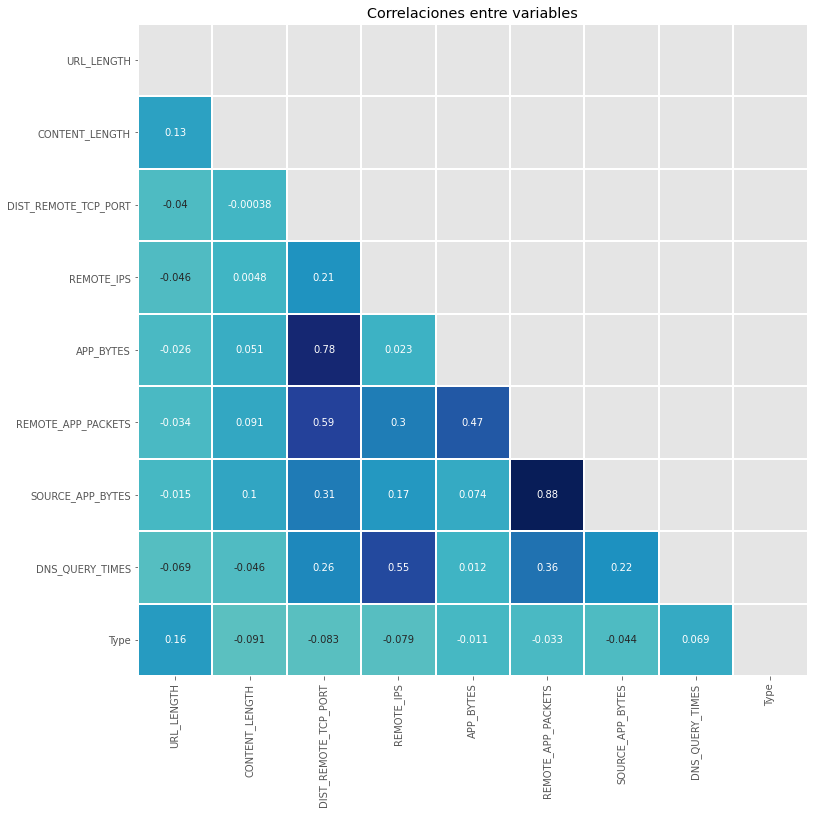

In [ ]:
visual_corr(websites)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [ ]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1781 non-null   object 
 1   URL_LENGTH            1781 non-null   int64  
 2   CHARSET               1781 non-null   object 
 3   SERVER                1780 non-null   object 
 4   CONTENT_LENGTH        969 non-null    float64
 5   WHOIS_COUNTRY         1781 non-null   object 
 6   WHOIS_STATEPRO        1781 non-null   object 
 7   WHOIS_REGDATE         1781 non-null   object 
 8   WHOIS_UPDATED_DATE    1781 non-null   object 
 9   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 10  REMOTE_IPS            1781 non-null   int64  
 11  APP_BYTES             1781 non-null   int64  
 12  REMOTE_APP_PACKETS    1781 non-null   int64  
 13  SOURCE_APP_BYTES      1781 non-null   int64  
 14  DNS_QUERY_TIMES       1780 non-null   float64
 15  Type                 

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [ ]:
websites.drop(columns="CONTENT_LENGTH",inplace=True)

In [ ]:
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [ ]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1779 non-null   object 
 1   URL_LENGTH            1779 non-null   int64  
 2   CHARSET               1779 non-null   object 
 3   SERVER                1779 non-null   object 
 4   WHOIS_COUNTRY         1779 non-null   object 
 5   WHOIS_STATEPRO        1779 non-null   object 
 6   WHOIS_REGDATE         1779 non-null   object 
 7   WHOIS_UPDATED_DATE    1779 non-null   object 
 8   DIST_REMOTE_TCP_PORT  1779 non-null   int64  
 9   REMOTE_IPS            1779 non-null   int64  
 10  APP_BYTES             1779 non-null   int64  
 11  REMOTE_APP_PACKETS    1779 non-null   int64  
 12  SOURCE_APP_BYTES      1779 non-null   int64  
 13  DNS_QUERY_TIMES       1779 non-null   float64
 14  Type                  1779 non-null   int64  
dtypes: float64(1), int64(

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [ ]:
pd.unique(websites.WHOIS_COUNTRY)

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [ ]:
dict_replace={"CYPRUS":"CY","UNITED KINGDOM":"UK","[U'GB'; U'UK']":"UK","GB":"UK"}

In [ ]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.apply(lambda x: x.upper())
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace(dict_replace)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [ ]:
country=websites.WHOIS_COUNTRY.value_counts()
country[0:10]

US      1105
NONE     306
CA        83
ES        63
AU        35
UK        35
PA        21
JP        11
CN        10
IN        10
Name: WHOIS_COUNTRY, dtype: int64

In [ ]:
country=country.index.to_list()

In [ ]:
country.pop(1)

'NONE'

In [ ]:
import numpy as np

In [ ]:
arange=np.arange(10,len(country),1)

In [ ]:
dict_top={}
for i in range(10):
  dict_top[country[i]]=country[i]

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [ ]:
for i in arange:
  dict_top[country[i]]="OTHER"

In [ ]:
dict_top["NONE"]="OTHER"

In [ ]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace(dict_top)

In [ ]:
websites.WHOIS_COUNTRY.unique()

array(['OTHER', 'US', 'UK', 'AU', 'CA', 'PA', 'IN', 'JP', 'CN', 'CZ',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [ ]:
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [ ]:
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
REMOTE_APP_PACKETS        int64
SOURCE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [ ]:
websites.drop(columns="URL",inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [ ]:
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [ ]:
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](https://github.com/eduardoheros/lab-supervised-learning/blob/master/think-hard.jpg?raw=1)

In [ ]:
#Escoger las ramas principales de servidores

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
import re
todos=re.compile("microsoft|apache|nginx",flags=re.IGNORECASE)
microsoft=re.compile("microsoft",flags=re.IGNORECASE)
apache=re.compile("apache",flags=re.IGNORECASE)
nginx=re.compile("nginx",flags=re.IGNORECASE)

In [ ]:
websites.SERVER=websites.SERVER.apply(lambda x: "other" if todos.search(x)==None else x)
websites.SERVER=websites.SERVER.apply(lambda x: "msft" if microsoft.search(x)!=None else x)
websites.SERVER=websites.SERVER.apply(lambda x: "apache" if apache.search(x)!=None else x)
websites.SERVER=websites.SERVER.apply(lambda x: "nginx" if nginx.search(x)!=None else x)

In [ ]:
websites.SERVER.unique()

array(['nginx', 'apache', 'msft', 'other'], dtype=object)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [ ]:
websites_dummy=pd.get_dummies(websites,drop_first=False)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [ ]:
websites_dummy

URL_LENGTH  DIST_REMOTE_TCP_PORT  ...  WHOIS_COUNTRY_UK  WHOIS_COUNTRY_US
0             16                     0  ...                 0                 0
1             16                     7  ...                 0                 0
2             16                     0  ...                 0                 0
3             17                    22  ...                 0                 1
4             17                     2  ...                 0                 1
...          ...                   ...  ...               ...               ...
1776         194                     0  ...                 0                 0
1777         198                     0  ...                 0                 0
1778         201                     2  ...                 0                 1
1779         234                     0  ...                 0                 1
1780         249                     6  ...                 0                 1

[1779 rows x 32 columns]

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [ ]:
from sklearn.model_selection import train_test_split
X=websites_dummy.drop(columns="Type")
y=websites_dummy.Type
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
y_pred=model.predict(X_test)

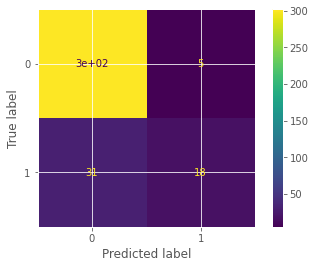

In [ ]:
confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(model,X_test,y_test);

In [ ]:
accuracy_score(y_test,y_pred)

0.898876404494382

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
#87% parece una buena aproximación en general, aunque habría que ver más a detalle si la sensibilidad es adecuada

#### Our second algorithm is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9073033707865169

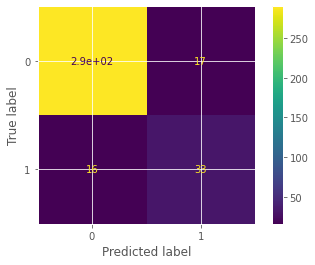

In [ ]:
plot_confusion_matrix(model,X_test,y_test);

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9073033707865169

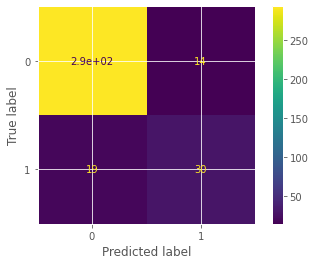

In [ ]:
plot_confusion_matrix(model,X_test,y_test);

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
#Me parece que la precisión es la misma

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [62]:
from sklearn.preprocessing import RobustScaler

In [63]:
escala=RobustScaler()

In [ ]:
X_train=escala.fit_transform(X_train,y_train)
X_test=escala.transform(X_test)

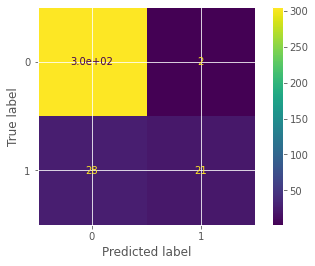

In [96]:
model=KNeighborsClassifier(n_neighbors=18)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

plot_confusion_matrix(model,X_test,y_test);

In [97]:
accuracy_score(y_test,y_pred)

0.9157303370786517